In [1]:
# Connecting google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pickle
import json

## Basic Data Exploration Tasks
* Reading the data using python
* Check the first five rows
* Get the shape of the data frame (Rows and Columns)
* Get the column names of the data frame
* Get the count of Houses, gouped by area_type
* Get the column types of the data frame
* Drop useless columns 'area_type', 'balcony', 'availablity' and 'society'


In [3]:
# Reading the 'BLR_HousePeice_RealEstate_Data.csv' as blr_data
blr_data = pd.read_csv('/content/drive/MyDrive/Datasets/BLR_HousePrice_RealEstate_Project_Data.csv')
blr_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Check the dimensionaliy of the data
print('Number of Rows in the blr_data dataframe is:', blr_data.shape[0])
print('Number of Columns in the blr_data dataframe is:', blr_data.shape[1])

Number of Rows in the blr_data dataframe is: 13320
Number of Columns in the blr_data dataframe is: 9


In [5]:
# Check the column names of the data frame
blr_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# Get the number of houses per area type from the data set
blr_data.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [7]:
# Check column types of the data frame
blr_data.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


In [8]:
# Drop the columns 'area_type', 'availability', 'society' and 'balcony' from blr_data
# Store the result in a variable called blr_data2
blr_data2 = blr_data.drop(['area_type', 'availability', 'society', 'balcony'], axis = 1)
blr_data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Cleaning the data frame
* Check for missing values (NA) values in the data frame
* Drop the rows that contains the missing values
* Removing discrepencides from the 'size' column by defining function and converting it into an interger object as a new column 'BHK'
* Handling discrepencies in the total_sqft column, converting range to numbers and drop the rest

In [9]:
# Check for missing values in the newly created data frame
blr_data2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [10]:
# Since, my data set has 13000 rows, so I am going to drop the rows containing missing values
blr_data3 = blr_data2.dropna()
blr_data3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [11]:
# Check how many rows are dropped by droping rows
print('Number of Rows in original data frame is:', blr_data.shape[0])
print('Number of Rows in latest data frame is:', blr_data3.shape[0])
# So, 74 rows are dropped

Number of Rows in original data frame is: 13320
Number of Rows in latest data frame is: 13246


In [12]:
# Look at the entries of the size column in blr_data3 data
blr_data3['size'].unique()

# Some discrepencies can be seen in this column: some entries are BKH, some are Bedroom
# We need to make it uniform in order to build the model

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
# Define a function that will tokenize the string values in size column by space
# Then it will take the first entry and create another column called 'BHK' in blr_data3 data
# Define the function bhk_converter
def bhk_converter(string):
  splitted_string = string.split(' ')
  return splitted_string[0]

# Apply the function to create another column called BHK
blr_data3['BHK'] = blr_data3['size'].apply(bhk_converter)

# Drop the 'size' column
blr_data3.drop(['size'], axis = 1, inplace = True)

blr_data3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [14]:
# Check the column types of blr_data3
blr_data3.dtypes

,0
location,object
total_sqft,object
bath,float64
price,float64
BHK,object


In [15]:
# The BHK column is of object type
# Convert it into an integer format
blr_data3['BHK'] = blr_data3['BHK'].astype(int)
blr_data3.dtypes

,0
location,object
total_sqft,object
bath,float64
price,float64
BHK,int64


In [21]:
# Observing the 'total_sqft' column
blr_data3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# There are some entries that are like range
# Convert them into single entries using their mean values
# Define a function for this work named convert_sqft_to_num
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return(float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [19]:
# Create a new data frame called blr_data4, which is a copy of blr_data3
blr_data4 = blr_data3.copy()
blr_data4['total_sqft'] = blr_data4['total_sqft'].apply(convert_sqft_to_num)
blr_data4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [23]:
# Check the final dimnensions of the blr_data4 before the next step
blr_data4.shape # The shape remians same

(13246, 5)

## Feature Engineering steps
* Make a deep copy of blr_data4 in to blr_data5
* Create a new column called 'price_per_sqft' as price/total_sqft
* Explore the length of unique entries of the location column
* Write a function to strip any extra spaces from the entries of location column
* Get a summary statistics of groupby locations in descending order to get the number of data points per location
* Chage the location name to 'other' for the locations having less than or equal to 10 houses

In [24]:
# Make a deep copy of the bl_data4 in a new data frame variable blr_data5
blr_data5 = blr_data4.copy()

In [25]:
# Create the 'price_per_sqft' column in blr_data5
blr_data5['price_per_sqft'] = (blr_data5['price'] * 100000)/blr_data5['total_sqft']
blr_data5.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [26]:
# Observe the number of unique entries in location column
print('Number of Uniue entries in location column is:', len(blr_data5['location'].unique()))

Number of Uniue entries in location column is: 1304


In [27]:
# Strip of any extra space from the entries of the location column
def strip_space(string):
  return string.strip()

# Apply the function on the location column
blr_data5['location'] = blr_data5['location'].apply(strip_space)

In [29]:
# Get a short statistical summary on number of houses per location
location_stat = blr_data5.groupby('location')['location'].agg('count').sort_values(ascending = False)
print(location_stat)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64


In [30]:
# How many locations have less than 10 data points
len(location_stat[location_stat <= 10])

1052

In [33]:
# Store the locations having less than or equal to 10 houses
location_less_equal_10 = location_stat[location_stat <= 10]
location_less_equal_10

,location
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [35]:
# Define a function called loc_conv that will convert the location name to other
# For the locations in location_less_equal_10
def loc_conv(place):
  if place in location_less_equal_10:
    return 'other'
  else:
    return place

# Apply the function on the blr_data5 data frame's location column
blr_data5['location'] = blr_data5['location'].apply(loc_conv)
len(blr_data5['location'].unique())


242

In [36]:
# Get first records of blr_data5 data frame
blr_data5.sample(7)

,location,total_sqft,bath,price,BHK,price_per_sqft
11550,other,1330.0,3.0,65.00,3,4887.218045
6535,Yeshwanthpur,1240.0,2.0,80.00,2,6451.612903
9302,Ananth Nagar,810.0,2.0,25.50,2,3148.148148
1307,Kambipura,1082.0,2.0,45.00,3,4158.964880
7738,Subramanyapura,958.0,2.0,34.49,2,3600.208768
2325,Sahakara Nagar,1655.0,3.0,115.00,3,6948.640483
3277,Marathahalli,1215.0,2.0,58.86,2,4844.444444


## Outlier detection and Outlier handling steps
* Check the shape of blr_data5 data frame
* Make a deep copy of blr_data5 as blr_data6
* Calculate the toatl_sqft_per_bedroom column in blr_data6
* If the column value is less than 300 (confirmed by my manager), then it is an outlier
* Remove it from the data frame
* Removing houses that costs more for 1 BHK than 2 BHK, same for 2 and 3 BHK
* Remove houses that has number of bathrooms +2 than bhk

In [37]:
# Check the shape of blr_data5 data frame
blr_data5.shape

(13246, 6)

In [38]:
# Mak a deep copy of blr_data5
blr_data6 = blr_data5.copy()

In [39]:
# Calculate 'total_sqft_per_bhk' column in blr_data6
blr_data6['total_sqft_per_bhk'] = blr_data6['total_sqft'] / blr_data6['BHK']
blr_data6.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,total_sqft_per_bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,600.0


In [43]:
# Select only the rows having total_sqft_per_bhk value greater than 300
blr_data6 = blr_data6[blr_data6['total_sqft_per_bhk'] >= 300]
blr_data6.shape

(12274, 7)

In [44]:
# Get a statistical summary of the price_per_sqft column
blr_data6['price_per_sqft'].describe()

# The minimum and maximum value for this price_per_sqft column is meaningless

,price_per_sqft
count,12274.000000
mean,6211.880230
std,4053.214807
min,267.829813
25%,4200.000000
50%,5263.157895
75%,6825.474875
max,176470.588235


In [45]:
# Write a function to handle the outliers in the price_per_sqft column
# So, we are going to remove all entries in price_per_sqft column that are behond 1-std away from mean
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
blr_data7 = remove_pps_outliers(blr_data6)
blr_data7.shape

(10016, 7)

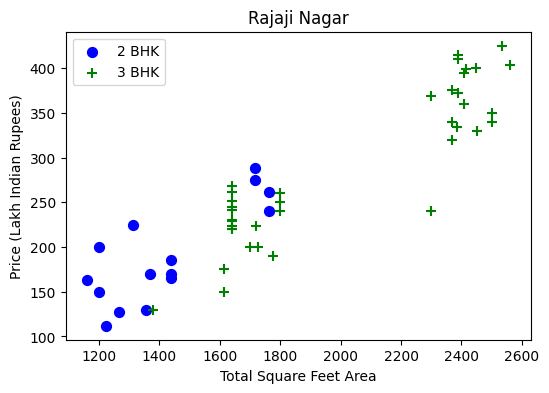

In [49]:
# Define a function to check any abnormality in price w.r.t total_sqft in blr_data7 data frame for Rajaji Nagar
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    plt.rcParams['figure.figsize'] = (6,4)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s =50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(blr_data7, "Rajaji Nagar")

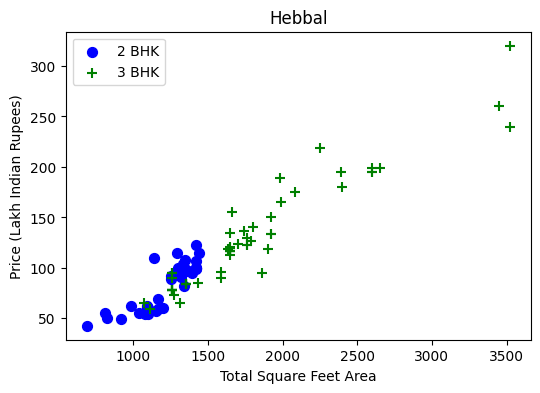

In [50]:
# Define a function to check any abnormality in price w.r.t total_sqft in blr_data7 data frame for Hebbal
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    plt.rcParams['figure.figsize'] = (6,4)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s =50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(blr_data7, "Hebbal")

## We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },

    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

In [53]:
# Clearly there are some ouliers
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
blr_data8 = remove_bhk_outliers(blr_data7)
# df8 = df7.copy()
blr_data8.shape

# Plotting the scatter plot will definitely show improvement

(7164, 7)

Text(0, 0.5, 'Count')

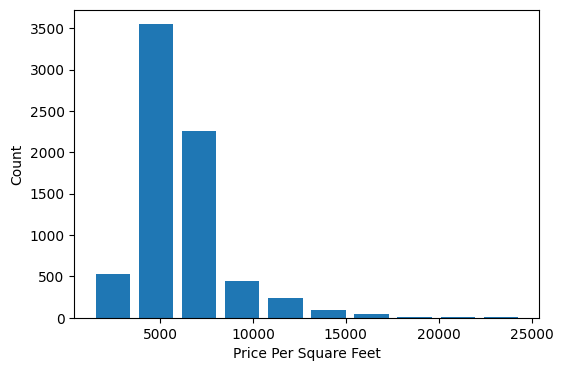

In [54]:
# Get the distribution of price_per_sqft column
plt.rcParams["figure.figsize"] = (6,4)
plt.hist(blr_data8.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [55]:
# Get the column names of blr_data8 data frame
blr_data8.columns

Index(['location', 'total_sqft', 'bath', 'price', 'BHK', 'price_per_sqft',
       'total_sqft_per_bhk'],
      dtype='object')

In [56]:
# Explore the unique values of bath
blr_data8['bath'].unique()
# Some houses have 13 bathrooms

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

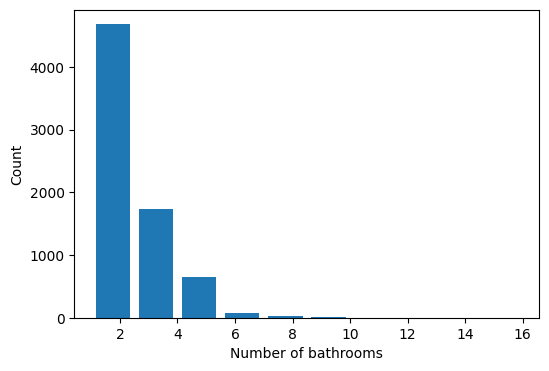

In [58]:
# Get the distribution of the bath column using histogram
plt.figure(figsize = (6,4))
plt.hist(blr_data8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [61]:
# How many houses has more than 10 bathrooms
blr_data8[blr_data8.bath > 10]

,location,total_sqft,bath,price,BHK,price_per_sqft,total_sqft_per_bhk
5138,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000,400.000000
8307,other,12000.0,12.0,525.0,10,4375.000000,1200.000000
8392,other,10000.0,16.0,550.0,16,5500.000000,625.000000
9106,other,6000.0,12.0,150.0,11,2500.000000,545.454545
9431,other,5425.0,13.0,275.0,13,5069.124424,417.307692


In [62]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
blr_data8[blr_data8.bath > blr_data8.BHK + 2]

,location,total_sqft,bath,price,BHK,price_per_sqft,total_sqft_per_bhk
1565,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520,615.000000
5099,Nagasandra,7000.0,8.0,450.0,4,6428.571429,1750.000000
6562,Thanisandra,1806.0,6.0,116.0,3,6423.034330,602.000000
8232,other,11338.0,9.0,1000.0,6,8819.897689,1889.666667


In [63]:
# Store the results where bathrooms are less than bhk + 2
blr_data9 = blr_data8[blr_data8.bath < blr_data8.BHK + 2]
blr_data9.shape

(7088, 7)

## Preparing the data frame for model building
* Make a deep copy of blr_data9 as df
* Check column entries
* Drop unnecessary columns
* One hot encode the location column, delete location column and drop the other dummy

In [70]:
# Make a deep copy of blr_data9 as df
df = blr_data9.copy()

In [71]:
# Check the columns of df
df.columns

Index(['location', 'total_sqft', 'bath', 'price', 'BHK', 'price_per_sqft',
       'total_sqft_per_bhk'],
      dtype='object')

In [72]:
# Drop the 'price_per_sqft' and 'total_sqft_per_bhk' column
df = df.drop(['price_per_sqft', 'total_sqft_per_bhk'], axis = 1)
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [73]:
# One hot encode the location column using .get_dummies() method
dummies = pd.get_dummies(df['location']).astype(int)
# Drop the other dummy from dummies
dummies = dummies.drop(['other'], axis = 1)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Concat the df and dummies data frame
# Store it as df_2
df_2 = pd.concat([df, dummies], axis = 1)
df_2 = df_2.drop(['location'], axis = 1)
df_2.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Get the shape of the df_2 data frame
print(df_2.shape)

# This is the final data frame for model building
# Store the data using data
data = df_2

(7088, 245)


## Build the machine learning model
* Separate input(X) and output(y): output is price
* Train test split the X and y using 20% test size and random state 10
* Build a linear regression model as lr_model: define, tain, test
* Use Cross validation and GridSearchCV to find best model
* Save the model as 'RealEstate_Model' using pickle


In [77]:
# Separating the input(X) and output(y) features
X = data.drop(['price'], axis = 1)
y = data.price

In [79]:
# Train test split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [80]:
# Build the linear regression model: Define, fit training data, check model score on test data
# Name the model as lr_model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8751466170466182

In [82]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.86195477, 0.86419585, 0.82068946, 0.82709117, 0.89136565])

In [87]:
# We can see that in 5 iterations we get a score above 80% all the time.
# This is pretty good but we want to test few other algorithms for regression
# To see if we can get even better score.
# We will use GridSearchCV for this purpose
# Compare linear regression, lasso regularization and decision tree
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {'model': LinearRegression(), 'params': {'fit_intercept': [True, True]}},
        'lasso': {'model': Lasso(), 'params': {'alpha': [1,2], 'selection': ['random', 'cyclic']}},
        'decision_tree': {'model': DecisionTreeRegressor(), 'params': {'criterion' : ['mse','friedman_mse'], 'splitter': ['best','random']}}
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853059,{'fit_intercept': True}
1,lasso,0.706897,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.770599,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [89]:
# Save and import the model using pickle
with open('BLR_RealEstate_Model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [91]:
# Export location and column information to a file that will be useful later on in our prediction application
columns = {'data_columns' : [col.lower() for col in X.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))